In [3]:
!pip install opencv-python

     |████████████████████████████████| 55.7 MB 10.7 MB/s eta 0:00:01
You should consider upgrading via the '/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/motevanalysisenv/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # For pairplots and heatmaps
import matplotlib.pyplot as plt
import glob

### Data loading and preprocessing

In [6]:
data_path = "/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/"
merged_df = []
for file_name in glob.glob(data_path+'*.csv'):
    print(file_name)
    df = pd.read_csv(file_name)
    merged_df.append(df)
df = pd.concat(merged_df)
## Filter data only for Coloring Game
df = df[df['game_type'] == "Coloring"]
df

/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/P31.csv
/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/Discovery_World_Day2.csv
/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/P30.csv
/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/Discovery_World_Day1.csv
/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/at_the_market_error.csv
/Users/mdraihanmia/Ubicomp/PMNL/MotEv/MotorEvaluation/analysis/ExperimentalAnalysis/FeasibilityTesting/Data/P29.csv


,user_id,name,age,location,used_hand,study_id,study_day,try_allowed,try_number,try_remaining,...,total_time,data,hand,object_name,drop_box,p1,p2,is_error,rmse,time_diff_ss
0,ZURFW1,P30,2011-08-05,Lab,Right,21.0,Day-1,50.0,18.0,32.0,...,126.0,"[""points"": [[""starttime"": ""2023-06-20 15:01:45...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,17W8X3,P13,2020-08-14,Indoor,Right,35.0,Day-1,100.0,41.0,59.0,...,126.0,"[""trinagle"": [""p2"": (614.7, 409.6), ""p1"": (136...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_color = df.loc[[0]]
df_color

,user_id,name,age,location,used_hand,study_id,study_day,try_allowed,try_number,try_remaining,...,total_time,data,hand,object_name,drop_box,p1,p2,is_error,rmse,time_diff_ss
0,ZURFW1,P30,2011-08-05,Lab,Right,21.0,Day-1,50.0,18.0,32.0,...,126.0,"[""points"": [[""starttime"": ""2023-06-20 15:01:45...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data = df_color["data"].values[0]
data

'["points": [["starttime": "2023-06-20 15:01:45.9570", "path": [(416.0, 339.5), (417.0, 334.5), (418.5, 331.5), (419.5, 328.5), (422.5, 323.0), (425.0, 317.5), (426.5, 314.5), (427.5, 312.5), (428.0, 311.5), (428.0, 311.0), (428.0, 312.5), (428.0, 314.5), (428.0, 317.0), (428.0, 320.5), (428.0, 324.5), (428.0, 330.0), (428.0, 337.0), (428.0, 345.0), (427.5, 352.0), (427.0, 360.0), (426.0, 368.0), (425.5, 375.0), (425.5, 381.0), (425.5, 386.0), (425.5, 390.5), (425.5, 392.5), (425.5, 393.5), (426.0, 393.0), (427.5, 388.0), (430.0, 379.5), (433.5, 370.0), (437.5, 358.0), (442.0, 345.0), (446.0, 333.0), (449.5, 322.0), (453.0, 313.0), (454.5, 306.0), (455.5, 302.0), (456.5, 300.5), (456.5, 300.0), (456.5, 300.5), (456.5, 303.5), (456.5, 307.5), (456.0, 313.5), (455.0, 320.5), (454.0, 330.5), (452.0, 342.0), (449.5, 352.0), (447.5, 362.5), (446.0, 372.0), (445.0, 380.0), (445.0, 389.0), (445.0, 396.5), (445.0, 401.0), (445.0, 403.5), (445.5, 403.5), (446.0, 403.5), (447.0, 402.5), (448.0, 

In [26]:
#s = data.split("points")
#print(data)
base_points = '{' + data[-236:-1]  + '}'
base_points = base_points.replace('[', '{')
base_points = base_points.replace(']', '}')
base_points = eval(base_points)
print(base_points)
#Triangle Points
pt1 = list(base_points['trinagle']['p1'])
pt2 = list(base_points['trinagle']['p2'])
pt3 = list(base_points['trinagle']['p3'])

pt1[1] = 1000-pt1[1]
pt2[1] = 1000-pt2[1]
pt3[1] = 1000-pt3[1]

print(pt1, pt2, pt3)


# Circle center & radius
circle_c = [base_points['circle']['center_x'], 1000 - base_points['circle']['center_y']]
circle_r = base_points['circle']['radius']
print(circle_c, circle_r)

{'trinagle': {'p2': (505.70000000000005, 288.0), 'p1': (116.69999999999999, 144.0), 'p3': (466.79999999999995, 503.99999999999994)}, 'circle': {'center_y': 251.99999999999997, 'center_x': 622.4000000000001, 'radius': 249.66666666666666}}
[116.69999999999999, 856.0] [505.70000000000005, 712.0] [466.79999999999995, 496.00000000000006]
[622.4000000000001, 748.0] 249.66666666666666


In [27]:
import re
coloring = data[:-236].split(':')
color = []
path = []
width = []
for i in range(0, len(coloring)):
#     print(coloring[i])
    if('path' in coloring[i]):
        col = coloring[i+1]
#         print(col)
        idx = col.find(')]')
        col = col[:idx+2]
        path.append(eval(col))
    if('width' in coloring[i]):
        col = coloring[i+1]
        w = re.findall("\d+\.\d+", col)
        width.append(float(w[0]))
    if('color' in coloring[i]):
        col = coloring[i+1]
        c = col[2:9]
        color.append(str(c))

print(path, width, color)

[[(416.0, 339.5), (417.0, 334.5), (418.5, 331.5), (419.5, 328.5), (422.5, 323.0), (425.0, 317.5), (426.5, 314.5), (427.5, 312.5), (428.0, 311.5), (428.0, 311.0), (428.0, 312.5), (428.0, 314.5), (428.0, 317.0), (428.0, 320.5), (428.0, 324.5), (428.0, 330.0), (428.0, 337.0), (428.0, 345.0), (427.5, 352.0), (427.0, 360.0), (426.0, 368.0), (425.5, 375.0), (425.5, 381.0), (425.5, 386.0), (425.5, 390.5), (425.5, 392.5), (425.5, 393.5), (426.0, 393.0), (427.5, 388.0), (430.0, 379.5), (433.5, 370.0), (437.5, 358.0), (442.0, 345.0), (446.0, 333.0), (449.5, 322.0), (453.0, 313.0), (454.5, 306.0), (455.5, 302.0), (456.5, 300.5), (456.5, 300.0), (456.5, 300.5), (456.5, 303.5), (456.5, 307.5), (456.0, 313.5), (455.0, 320.5), (454.0, 330.5), (452.0, 342.0), (449.5, 352.0), (447.5, 362.5), (446.0, 372.0), (445.0, 380.0), (445.0, 389.0), (445.0, 396.5), (445.0, 401.0), (445.0, 403.5), (445.5, 403.5), (446.0, 403.5), (447.0, 402.5), (448.0, 397.0), (450.0, 387.5), (453.0, 375.5), (456.5, 361.0), (460.0

In [28]:
#Convert tuple to list and rotate y axis
for i in range(0, len(path)):
    for j in range(0, len(path[i])):
        path[i][j] = list(path[i][j])
        path[i][j][1] = 1000 - path[i][j][1]

# Split Data into triangle & circle
i = 0
for i in range(0, len(color)):
    if(color[i] != color[i+1]):
        break
tri_path = path[:i+1]
tri_color = color[:i+1]
tri_width = width[:i+1]
cir_path = path[i+1:]
cir_color = color[i+1:]
cir_width = width[i+1:]
print(tri_path, tri_color, cir_color)

[[[416.0, 660.5], [417.0, 665.5], [418.5, 668.5], [419.5, 671.5], [422.5, 677.0], [425.0, 682.5], [426.5, 685.5], [427.5, 687.5], [428.0, 688.5], [428.0, 689.0], [428.0, 687.5], [428.0, 685.5], [428.0, 683.0], [428.0, 679.5], [428.0, 675.5], [428.0, 670.0], [428.0, 663.0], [428.0, 655.0], [427.5, 648.0], [427.0, 640.0], [426.0, 632.0], [425.5, 625.0], [425.5, 619.0], [425.5, 614.0], [425.5, 609.5], [425.5, 607.5], [425.5, 606.5], [426.0, 607.0], [427.5, 612.0], [430.0, 620.5], [433.5, 630.0], [437.5, 642.0], [442.0, 655.0], [446.0, 667.0], [449.5, 678.0], [453.0, 687.0], [454.5, 694.0], [455.5, 698.0], [456.5, 699.5], [456.5, 700.0], [456.5, 699.5], [456.5, 696.5], [456.5, 692.5], [456.0, 686.5], [455.0, 679.5], [454.0, 669.5], [452.0, 658.0], [449.5, 648.0], [447.5, 637.5], [446.0, 628.0], [445.0, 620.0], [445.0, 611.0], [445.0, 603.5], [445.0, 599.0], [445.0, 596.5], [445.5, 596.5], [446.0, 596.5], [447.0, 597.5], [448.0, 603.0], [450.0, 612.5], [453.0, 624.5], [456.5, 639.0], [460.0

In [29]:
# A utility function to calculate area
# of triangle formed by (x1, y1),
# (x2, y2) and (x3, y3)
def area(x1, y1, x2, y2, x3, y3):
    return abs((x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2)) / 2.0)

# lies inside the triangle formed by
# A(x1, y1), B(x2, y2) and C(x3, y3)
def isInside(x1, y1, x2, y2, x3, y3, x, y):
    # Calculate area of triangle ABC
    A = area (x1, y1, x2, y2, x3, y3)
    # Calculate area of triangle PBC
    A1 = area (x, y, x2, y2, x3, y3)
    # Calculate area of triangle PAC
    A2 = area (x1, y1, x, y, x3, y3)
    # Calculate area of triangle PAB
    A3 = area (x1, y1, x2, y2, x, y)
    # Check if sum of A1, A2 and A3
    # is same as A
    if(A == A1 + A2 + A3):
        return True
    else:
        return False

# Let us check whether the point P(10, 15)
# lies inside the triangle formed by
# A(0, 0), B(20, 0) and C(10, 30)
if (isInside(0, 0, 20, 0, 10, 30, 10, 15)):
    print('Inside')
else:
    print('Not Inside')

Inside


In [30]:
path

[[[416.0, 660.5],
  [417.0, 665.5],
  [418.5, 668.5],
  [419.5, 671.5],
  [422.5, 677.0],
  [425.0, 682.5],
  [426.5, 685.5],
  [427.5, 687.5],
  [428.0, 688.5],
  [428.0, 689.0],
  [428.0, 687.5],
  [428.0, 685.5],
  [428.0, 683.0],
  [428.0, 679.5],
  [428.0, 675.5],
  [428.0, 670.0],
  [428.0, 663.0],
  [428.0, 655.0],
  [427.5, 648.0],
  [427.0, 640.0],
  [426.0, 632.0],
  [425.5, 625.0],
  [425.5, 619.0],
  [425.5, 614.0],
  [425.5, 609.5],
  [425.5, 607.5],
  [425.5, 606.5],
  [426.0, 607.0],
  [427.5, 612.0],
  [430.0, 620.5],
  [433.5, 630.0],
  [437.5, 642.0],
  [442.0, 655.0],
  [446.0, 667.0],
  [449.5, 678.0],
  [453.0, 687.0],
  [454.5, 694.0],
  [455.5, 698.0],
  [456.5, 699.5],
  [456.5, 700.0],
  [456.5, 699.5],
  [456.5, 696.5],
  [456.5, 692.5],
  [456.0, 686.5],
  [455.0, 679.5],
  [454.0, 669.5],
  [452.0, 658.0],
  [449.5, 648.0],
  [447.5, 637.5],
  [446.0, 628.0],
  [445.0, 620.0],
  [445.0, 611.0],
  [445.0, 603.5],
  [445.0, 599.0],
  [445.0, 596.5],
  [445.5, 

In [32]:
# Split point into inside triangle and outside triangle
path_inside_tri = []
path_outside_tri = []
for path in tri_path:
#     print(path)
    temp_outside = []
    temp_inside = []
    for point in path:
#         print(point, pt1, pt2, pt3)
        if(isInside(pt1[0],pt1[1], pt2[0], pt2[1], pt3[0], pt3[1], point[0], point[1])):
            temp_inside.append(point)
        else:
            temp_outside.append(point)
#     print(temp_inside)
    if(temp_inside):
        path_inside_tri.append(temp_inside)
    if(temp_outside):
        path_outside_tri.append(temp_outside)
path_outside_tri

[[[416.0, 660.5],
  [417.0, 665.5],
  [419.5, 671.5],
  [422.5, 677.0],
  [425.0, 682.5],
  [426.5, 685.5],
  [427.5, 687.5],
  [428.0, 689.0],
  [428.0, 687.5],
  [428.0, 685.5],
  [428.0, 683.0],
  [428.0, 679.5],
  [428.0, 675.5],
  [428.0, 670.0],
  [428.0, 663.0],
  [428.0, 655.0],
  [427.5, 648.0],
  [427.0, 640.0],
  [426.0, 632.0],
  [425.5, 625.0],
  [425.5, 619.0],
  [425.5, 614.0],
  [425.5, 607.5],
  [425.5, 606.5],
  [430.0, 620.5],
  [433.5, 630.0],
  [437.5, 642.0],
  [442.0, 655.0],
  [446.0, 667.0],
  [449.5, 678.0],
  [453.0, 687.0],
  [454.5, 694.0],
  [455.5, 698.0],
  [456.5, 699.5],
  [456.5, 700.0],
  [456.5, 699.5],
  [456.5, 696.5],
  [456.5, 692.5],
  [456.0, 686.5],
  [455.0, 679.5],
  [454.0, 669.5],
  [452.0, 658.0],
  [449.5, 648.0],
  [447.5, 637.5],
  [446.0, 628.0],
  [445.0, 620.0],
  [445.0, 611.0],
  [445.0, 603.5],
  [445.0, 599.0],
  [445.0, 596.5],
  [445.5, 596.5],
  [446.0, 596.5],
  [447.0, 597.5],
  [448.0, 603.0],
  [450.0, 612.5],
  [456.5, 

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_14156/4189685838.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'k-', color = 'black', linewidth=0.2)
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_14156/4189685838.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([pt2[0], pt3[0]], [pt2[1], pt3[1]], 'k-', color = 'black', linewidth=0.2)
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_14156/4189685838.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([pt3[0], pt1[0]], [pt3[1], pt1[1]], 'k-', color = 'black', linewidth=0.2)


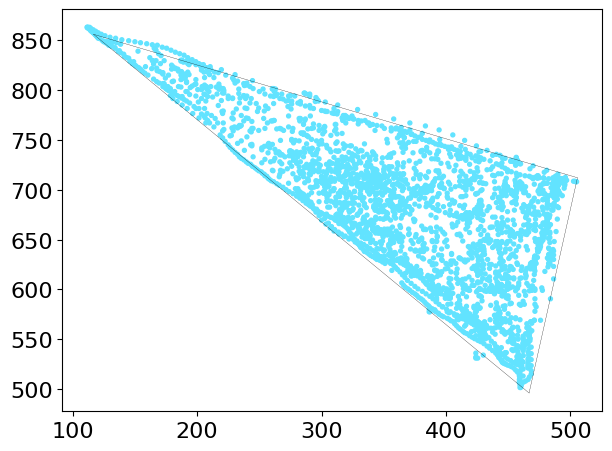

In [36]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.lines as lines
plt.rcParams.update({'font.size': 16})
plt.figure()
for i in range(0, len(path_outside_tri)):
#     print(path_outside_tri[i])
    X = np.array(path_outside_tri[i])
#     print(print(color[i]))
    # Y = ['#5D11F7', '#5D11F7', '#5D11F7']
    Y = [tri_color[i] for j in range(0, len(X))]
#     print(len(Y))
    plt.scatter(X[:, 0], X[:, 1], s = width[i]*2, color = Y[:])

plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'k-', color = 'black', linewidth=0.2)
plt.plot([pt2[0], pt3[0]], [pt2[1], pt3[1]], 'k-', color = 'black', linewidth=0.2)
plt.plot([pt3[0], pt1[0]], [pt3[1], pt1[1]], 'k-', color = 'black', linewidth=0.2)

# Save & SHow
plt.tight_layout()
#plt.savefig('triangle_outside.png')
plt.show()

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_14156/2254268492.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([path_inside_tri[i][j][0], path_inside_tri[i][j+1][0]], [path_inside_tri[i][j][1], path_inside_tri[i][j+1][1]], 'k-', color = tri_color[i], linewidth=width[i]/2)
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_14156/2254268492.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'k-', color = 'black', linewidth=0.2)
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_14156/2254268492.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([pt2[0], pt

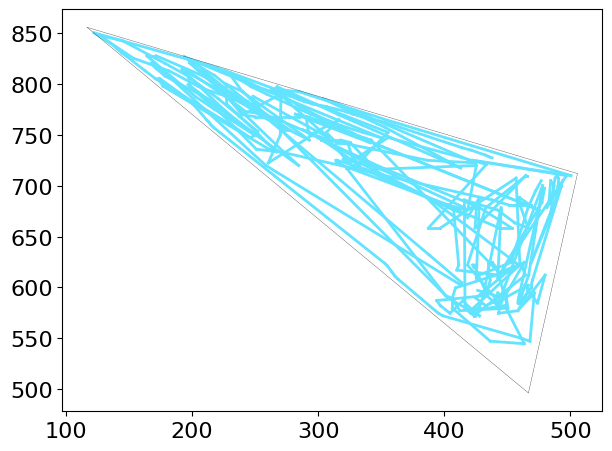

In [37]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.lines as lines

plt.figure()
for i in range(0, len(path_inside_tri)):
#     print(path_outside_tri[i])
#     X = np.array(path_inside_tri[i])
#     print(print(color[i]))
    # Y = ['#5D11F7', '#5D11F7', '#5D11F7']
#     Y = [tri_color[i] for j in range(0, len(X))]
#     print(len(Y))
#     plt.scatter(X[:, 0], X[:, 1], s = width[i], color = Y[:])
    for j in range(0, len(path_inside_tri[i])-1):
        plt.plot([path_inside_tri[i][j][0], path_inside_tri[i][j+1][0]], [path_inside_tri[i][j][1], path_inside_tri[i][j+1][1]], 'k-', color = tri_color[i], linewidth=width[i]/2)

plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'k-', color = 'black', linewidth=0.2)
plt.plot([pt2[0], pt3[0]], [pt2[1], pt3[1]], 'k-', color = 'black', linewidth=0.2)
plt.plot([pt3[0], pt1[0]], [pt3[1], pt1[1]], 'k-', color = 'black', linewidth=0.2)

# Save & SHow
plt.tight_layout()
#plt.savefig('triangle_inside.png')
plt.show()

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_14156/2546852588.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([tri_path[i][j][0], tri_path[i][j+1][0]], [tri_path[i][j][1], tri_path[i][j+1][1]], 'k-', color = tri_color[i], linewidth=width[i]/2)
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_14156/2546852588.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'k-', color = 'black', linewidth=0.2)
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_14156/2546852588.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([pt2[0], pt3[0]], [pt2[1], pt3[1]], 'k-

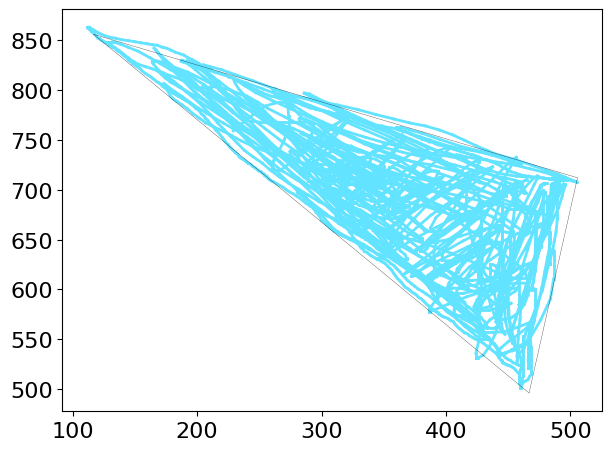

In [38]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.lines as lines

plt.figure()
for i in range(0, len(tri_path)):
#     print(path_outside_tri[i])
#     X = np.array(path_inside_tri[i])
#     print(print(color[i]))
    # Y = ['#5D11F7', '#5D11F7', '#5D11F7']
#     Y = [tri_color[i] for j in range(0, len(X))]
#     print(len(Y))
#     plt.scatter(X[:, 0], X[:, 1], s = width[i], color = Y[:])
    for j in range(0, len(tri_path[i])-1):
        plt.plot([tri_path[i][j][0], tri_path[i][j+1][0]], [tri_path[i][j][1], tri_path[i][j+1][1]], 'k-', color = tri_color[i], linewidth=width[i]/2)

plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'k-', color = 'black', linewidth=0.2)
plt.plot([pt2[0], pt3[0]], [pt2[1], pt3[1]], 'k-', color = 'black', linewidth=0.2)
plt.plot([pt3[0], pt1[0]], [pt3[1], pt1[1]], 'k-', color = 'black', linewidth=0.2)

# Save & SHow
plt.tight_layout()
# plt.savefig('coloring/triangle.png')
plt.show()

/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_14156/2275139410.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([path_outside_tri[i][j][0], path_outside_tri[i][j+1][0]], [path_outside_tri[i][j][1], path_outside_tri[i][j+1][1]], 'k-', color = tri_color[i], linewidth=width[i]/2)
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_14156/2275139410.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'k-', color = 'black', linewidth=0.2, zorder=10)
/var/folders/c5/gxvjzbzd36x1q68jgw7v4zl80000gn/T/ipykernel_14156/2275139410.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.p

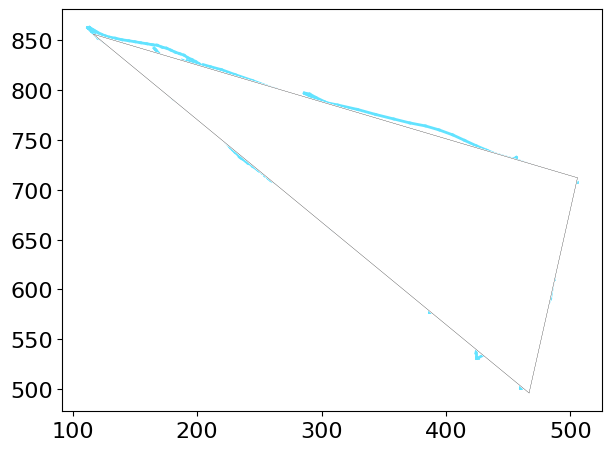

In [39]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.lines as lines

plt.figure()
X = np.array([pt1, pt2, pt3])
Y = [tri_color[i] for j in range(0, 3)]

# plt.figure()

for i in range(0, len(path_outside_tri)):
#     print(path_outside_tri[i])
#     X = np.array(path_inside_tri[i])
#     print(print(color[i]))
    # Y = ['#5D11F7', '#5D11F7', '#5D11F7']
#     Y = [tri_color[i] for j in range(0, len(X))]
#     print(len(Y))
#     plt.scatter(X[:, 0], X[:, 1], s = width[i], color = Y[:])
    for j in range(0, len(path_outside_tri[i])-1):
        plt.plot([path_outside_tri[i][j][0], path_outside_tri[i][j+1][0]], [path_outside_tri[i][j][1], path_outside_tri[i][j+1][1]], 'k-', color = tri_color[i], linewidth=width[i]/2)

plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'k-', color = 'black', linewidth=0.2, zorder=10)
plt.plot([pt2[0], pt3[0]], [pt2[1], pt3[1]], 'k-', color = 'black', linewidth=0.2, zorder=10)
plt.plot([pt3[0], pt1[0]], [pt3[1], pt1[1]], 'k-', color = 'black', linewidth=0.2, zorder=10)

plt.scatter(X[:, 0], X[:, 1], s = 0, color = Y[:], zorder=10)

t1 = plt.Polygon(X[:3,:], color='#FFFFFF', zorder=5)
plt.gca().add_patch(t1)
plt.gca().add_patch(t1)

# Save & SHow
plt.tight_layout()
# plt.savefig('coloring/triangle_outside.png')
plt.show()

In [40]:
Y[0]

'#62E3FF'

#### Circle Calculation

In [41]:
print(circle_c, circle_r)
cir_color

[622.4000000000001, 748.0] 249.66666666666666


['#2D7FC1', '#2D7FC1', '#B8E297']

In [42]:
import math
def is_inside_circle(x, y, center_x, center_y, r):
    if (math.sqrt((x - center_x) ** 2 + (y - center_y) ** 2) <= r):
        return True
    return False
print(is_inside_circle( 600, 600 ,648.0, 672.0, 230.0))

True


In [43]:
path_inside_cir = []
path_outside_cir = []
for path in cir_path:
#     print(path)
    temp_outside = []
    temp_inside = []
    for point in path:
#         print(point, pt1, pt2, pt3)
        if(is_inside_circle(point[0], point[1], circle_c[0], circle_c[1], circle_r)):
            temp_inside.append(point)
        else:
            temp_outside.append(point)
#     print(temp_inside)
    if(temp_inside):
        path_inside_cir.append(temp_inside)
    if(temp_outside):
        path_outside_cir.append(temp_outside)
path_outside_tri

[[[416.0, 660.5],
  [417.0, 665.5],
  [419.5, 671.5],
  [422.5, 677.0],
  [425.0, 682.5],
  [426.5, 685.5],
  [427.5, 687.5],
  [428.0, 689.0],
  [428.0, 687.5],
  [428.0, 685.5],
  [428.0, 683.0],
  [428.0, 679.5],
  [428.0, 675.5],
  [428.0, 670.0],
  [428.0, 663.0],
  [428.0, 655.0],
  [427.5, 648.0],
  [427.0, 640.0],
  [426.0, 632.0],
  [425.5, 625.0],
  [425.5, 619.0],
  [425.5, 614.0],
  [425.5, 607.5],
  [425.5, 606.5],
  [430.0, 620.5],
  [433.5, 630.0],
  [437.5, 642.0],
  [442.0, 655.0],
  [446.0, 667.0],
  [449.5, 678.0],
  [453.0, 687.0],
  [454.5, 694.0],
  [455.5, 698.0],
  [456.5, 699.5],
  [456.5, 700.0],
  [456.5, 699.5],
  [456.5, 696.5],
  [456.5, 692.5],
  [456.0, 686.5],
  [455.0, 679.5],
  [454.0, 669.5],
  [452.0, 658.0],
  [449.5, 648.0],
  [447.5, 637.5],
  [446.0, 628.0],
  [445.0, 620.0],
  [445.0, 611.0],
  [445.0, 603.5],
  [445.0, 599.0],
  [445.0, 596.5],
  [445.5, 596.5],
  [446.0, 596.5],
  [447.0, 597.5],
  [448.0, 603.0],
  [450.0, 612.5],
  [456.5, 

<Figure size 640x480 with 0 Axes>

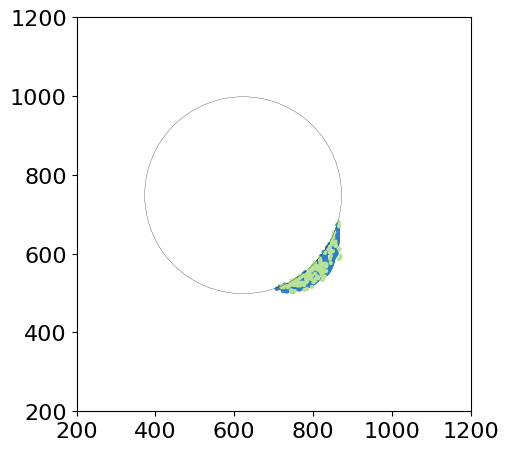

In [44]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.lines as lines

plt.figure()
figure, axes = plt.subplots()
for i in range(0, len(path_outside_cir)):
#     print(path_outside_tri[i])
    X = np.array(path_outside_cir[i])
#     print(print(color[i]))
    # Y = ['#5D11F7', '#5D11F7', '#5D11F7']
    Y = [cir_color[i] for j in range(0, len(X))]
#     print(len(Y))
    plt.scatter(X[:, 0], X[:, 1], s = width[i], color = Y[:])

Drawing_colored_circle = plt.Circle(circle_c, circle_r, fill=False, linewidth=0.2)
axes.set_aspect( 1 )
axes.add_artist( Drawing_colored_circle )
# plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'k-', color = 'black', linewidth=0.2)
# plt.plot([pt2[0], pt3[0]], [pt2[1], pt3[1]], 'k-', color = 'black', linewidth=0.2)
# plt.plot([pt3[0], pt1[0]], [pt3[1], pt1[1]], 'k-', color = 'black', linewidth=0.2)

plt.xlim(200, 1200);
plt.ylim(200, 1200);
# Save & SHow
plt.tight_layout()
# plt.savefig('coloring/circle_outside.png')
plt.show()

<Figure size 640x480 with 0 Axes>

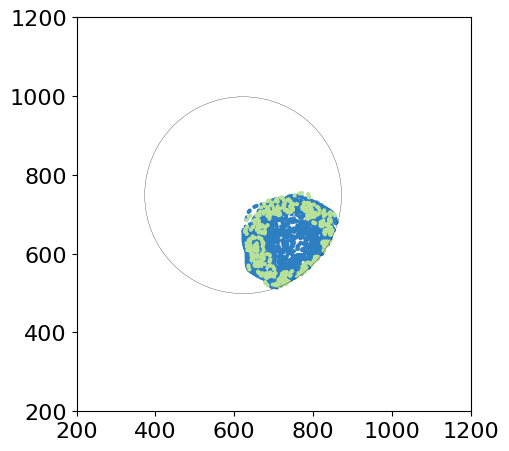

In [45]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.lines as lines

plt.figure()
figure, axes = plt.subplots()
for i in range(0, len(path_inside_cir)):
#     print(path_outside_tri[i])
    X = np.array(path_inside_cir[i])
#     print(print(color[i]))
    # Y = ['#5D11F7', '#5D11F7', '#5D11F7']
    Y = [cir_color[i] for j in range(0, len(X))]
#     print(len(Y))
    plt.scatter(X[:, 0], X[:, 1], s = width[i], color = Y[:])

Drawing_colored_circle = plt.Circle(circle_c, circle_r, fill=False, linewidth=0.2)
axes.set_aspect( 1 )
axes.add_artist( Drawing_colored_circle )
# plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'k-', color = 'black', linewidth=0.2)
# plt.plot([pt2[0], pt3[0]], [pt2[1], pt3[1]], 'k-', color = 'black', linewidth=0.2)
# plt.plot([pt3[0], pt1[0]], [pt3[1], pt1[1]], 'k-', color = 'black', linewidth=0.2)

plt.xlim(200, 1200);
plt.ylim(200, 1200);
# Save & SHow
plt.tight_layout()
# plt.savefig('coloring/circle_inside.png')
plt.show()

<Figure size 640x480 with 0 Axes>

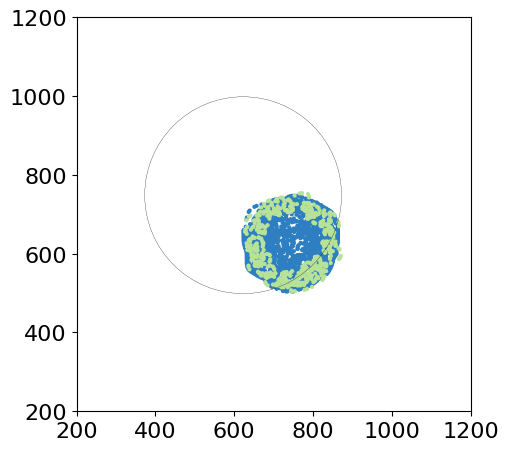

In [46]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.lines as lines

plt.figure()
figure, axes = plt.subplots()
for i in range(0, len(cir_path)):
#     print(path_outside_tri[i])
    X = np.array(cir_path[i])
#     print(print(color[i]))
    # Y = ['#5D11F7', '#5D11F7', '#5D11F7']
    Y = [cir_color[i] for j in range(0, len(X))]
#     print(len(Y))
    plt.scatter(X[:, 0], X[:, 1], s = width[i], color = Y[:])

Drawing_colored_circle = plt.Circle(circle_c, circle_r, fill=False, linewidth=0.2)
axes.set_aspect( 1 )
axes.add_artist( Drawing_colored_circle )
# plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'k-', color = 'black', linewidth=0.2)
# plt.plot([pt2[0], pt3[0]], [pt2[1], pt3[1]], 'k-', color = 'black', linewidth=0.2)
# plt.plot([pt3[0], pt1[0]], [pt3[1], pt1[1]], 'k-', color = 'black', linewidth=0.2)

plt.xlim(200, 1200);
plt.ylim(200, 1200);
# Save & SHow
plt.tight_layout()
# plt.savefig('coloring/circle.png')
plt.show()

In [47]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb
rgb_to_hex((255, 255, 195))

'#ffffc3'

In [48]:
#!/usr/bin/env python3

from PIL import Image
import numpy as np
import glob

def processLog(filename):
    print(f"Processing log: {filename}")
    # Open this image and make a Numpy version for easy processing
    im   = Image.open(filename).convert('RGBA').convert('RGB')
    imnp = np.array(im)
    h, w = imnp.shape[:2]

    # Get list of unique colours...
    # Arrange all pixels into a tall column of 3 RGB values and find unique rows (colours)
    colours, counts = np.unique(imnp.reshape(-1,3), axis=0, return_counts=1)

    # Iterate through unique colours
    for index, colour in enumerate(colours):
        count = counts[index]
        proportion = (100 * count) / (h * w)
#         print(type(colour), colour)
        if(colour[0] == 93 and colour[1] == 17 and colour[2] == 247): # Check the triangle color
            print(f"   Colour: {colour}, count: {count}, proportion: {proportion:.2f}%")
            return count
        if(colour[0] == 81 and colour[1] == 19 and colour[2] == 7): # Check the triangle color
            print(f"   Colour: {colour}, count: {count}, proportion: {proportion:.2f}%")
            return count

colouring_count = {}
# Iterate over all images called "log*png" in current directory
for filename in glob.glob('coloring/*.png'):
    count = processLog(filename)
    colouring_count[filename] = count

In [49]:
colouring_count

{}

### % Fill plots

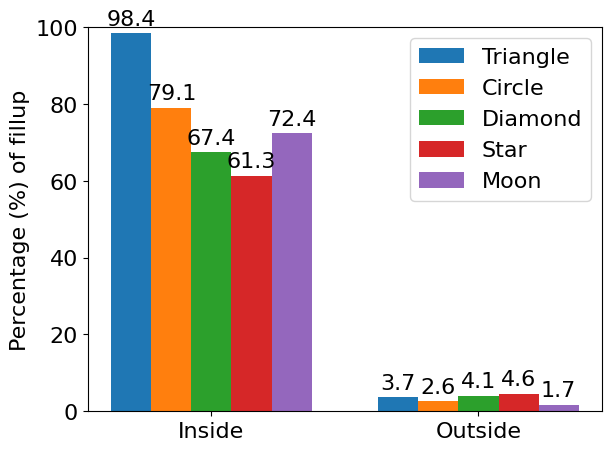

In [51]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Inside', 'Outside']
# tri_percentage = [(colouring_count['coloring/triangle_inside.png']/colouring_count['coloring/triangle.png'])*100.0,
#                  (colouring_count['coloring/triangle_outside.png']/colouring_count['coloring/triangle.png'])*100.0
#                  ]
# cir_percentage = [(colouring_count['coloring/circle_inside.png']/colouring_count['coloring/circle.png'])*100.0,
#                  (colouring_count['coloring/circle_outside.png']/colouring_count['coloring/circle.png'])*100.0
#                  ]
tri_percentage = [98.4, 3.7]
cir_percentage = [79.1, 2.6]
diamond_percentage = [67.4, 4.1]
star_percentage = [61.3, 4.6]
moon_percentage = [72.4, 1.7]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots()
rects1 = ax.bar(x + width, tri_percentage, width, label='Triangle')
rects2 = ax.bar(x + width*2, cir_percentage, width, label='Circle')
rects3 = ax.bar(x + width*3, diamond_percentage, width, label='Diamond')
rects4 = ax.bar(x + width*4, star_percentage, width, label='Star')
rects5 = ax.bar(x + width*5, moon_percentage, width, label='Moon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage (%) of fillup')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x+width*3, labels)
ax.legend()
ax.set_ylim([0, 100])

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)
ax.bar_label(rects5, padding=3)

fig.tight_layout()

plt.show()